### Importing Modules

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import skew
import seaborn as sns
import matplotlib.dates as dates

In [2]:
# Read in the csv file and parse dates
StockReturns = pd.read_csv("Big9Returns2017.csv", parse_dates=['Date'])
# Ensure the prices are sorted by Date
StockReturns = StockReturns.sort_values(by='Date')
# Print only the first five rows of StockPrices
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'])
print(StockReturns.head())

        Date      AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
0 2017-01-03  0.002849  0.007081  0.006980  0.005468  0.010894  0.005068   
1 2017-01-04 -0.001119 -0.004474 -0.011002 -0.001640  0.001844  0.004657   
2 2017-01-05  0.005085  0.000000 -0.014907  0.010463 -0.009205  0.030732   
3 2017-01-06  0.011148  0.008668 -0.000565 -0.004792  0.000116  0.019912   
4 2017-01-09  0.009159 -0.003183 -0.016497 -0.000172  0.000697  0.001168   

         GE        FB         T  
0  0.002848  0.015732  0.011521  
1  0.000316  0.015660 -0.005811  
2 -0.005678  0.016682 -0.002806  
3  0.002855  0.022707 -0.019924  
4 -0.004745  0.012074 -0.012585  


In [3]:
StockReturns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 10 columns):
Date    251 non-null datetime64[ns]
AAPL    251 non-null float64
MSFT    251 non-null float64
XOM     251 non-null float64
JNJ     251 non-null float64
JPM     251 non-null float64
AMZN    251 non-null float64
GE      251 non-null float64
FB      251 non-null float64
T       251 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 21.6 KB


### Calculating portfolio returns

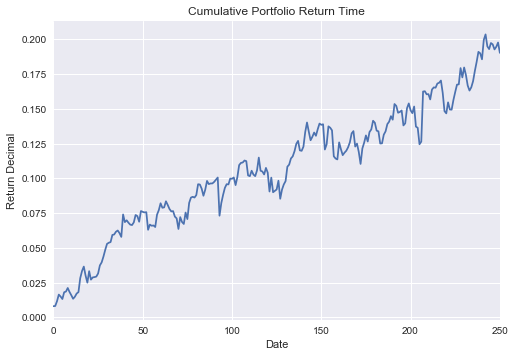

In [4]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.11,0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
ax = CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
ax = CumulativeReturns.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Return Decimal')
plt.title('Cumulative Portfolio Return Time')
#plt.xticks(StockReturns['Date'])
plt.show()


### Equal weighted portfolios

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

To make it easier for you to visualize the cumulative returns of portfolios, we defined the function cumulative_returns_plot() in your workspace.

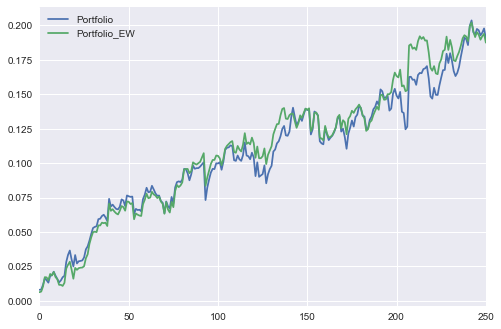

In [5]:
def cumulative_returns_plot(cols): 
    """
    cols: A list of column names to plot 
    """
    
    CumulativeReturns = ((1+StockReturns[cols]).cumprod()-1) 
    CumulativeReturns.plot() 
    plt.show()
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

### Market-cap weighted portfolios
Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

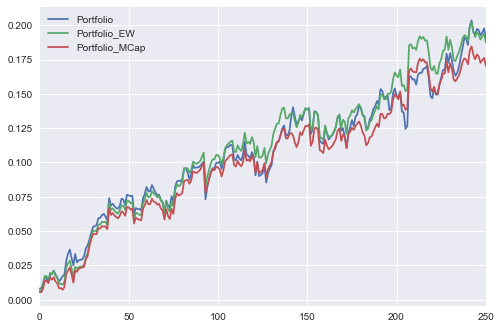

In [6]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

### The correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets. You can use the built-in .corr() method on a pandas DataFrame to easily calculate the correlation matrix.

Correlation ranges from -1 to 1. The diagonal of the correlation matrix is always 1, because a stock always has a perfect correlation with itself. The matrix is symmetric, which means that the lower triangle and upper triangle of the matrix are simply reflections of each other since correlation is a bi-directional measurement.

In [7]:
# Calculate the correlation matrix
correlation_matrix = StockReturns.iloc[:,0:10].corr()

# Print the correlation matrix
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055505  0.038432  0.199914  0.509472  0.006766   
MSFT  0.437430  1.000000  0.084108  0.230215  0.191248  0.621096 -0.044827   
XOM   0.055505  0.084108  1.000000  0.121012  0.305926  0.015118  0.193861   
JNJ   0.038432  0.230215  0.121012  1.000000  0.070328  0.052781  0.067930   
JPM   0.199914  0.191248  0.305926  0.070328  1.000000  0.013919  0.257401   
AMZN  0.509472  0.621096  0.015118  0.052781  0.013919  1.000000 -0.092188   
GE    0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188  1.000000   
FB    0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030 -0.024364   
T     0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909  0.292706   

            FB         T  
AAPL  0.542367  0.005082  
MSFT  0.543341 -0.021079  
XOM  -0.046813  0.197576  
JNJ   0.079391  0.091622  
JPM   0.095245  0.252832  
AMZN  0.653030 -0.017909  
GE   -0.024364  0.292706  
FB 

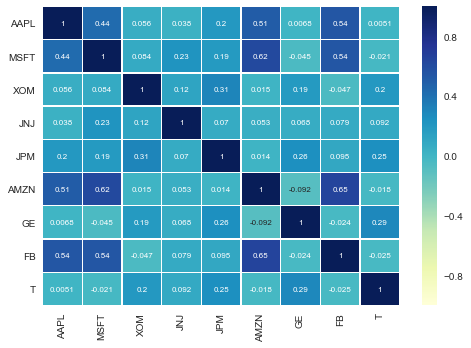

In [8]:
# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### The co-variance matrix

You can easily compute the co-variance matrix of a DataFrame of returns using the .cov() method.

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.

In [9]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:,0:10].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

### Portfolio standard deviation

In order to calculate portfolio volatility, you will need the covariance matrix, the portfolio weights, and knowledge of the transpose operation. The transpose of a numpy array can be calculated using the .T attribute. The np.dot() function is the dot-product of two arrays.

The formula for portfolio volatility is:

σPortfolio=wT⋅Σ⋅w−−−−−−−−√

σPortfolio: Portfolio volatility

Σ: Covariance matrix of returns

w: Portfolio weights (wT is transposed portfolio weights)

⋅ The dot-multiplication operator

portfolio_weights and cov_mat_annual are available in your workspace.

In [10]:
# Portfolio weights
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.0893141764271


### Importing Portfolios

In [11]:
RandomPortfolios = pd.read_csv("EfficientFrontierPortfoliosSlim.csv")

### Sharpe ratios

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

The original 1966 Sharpe ratio calculation is quite simple:

S=Ra−rfσa

S: Sharpe Ratio

Ra: Asset return

rf: Risk-free rate of return

σa: Asset volatility

The randomly generated portfolio is available as RandomPortfolios.

In [12]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


### The MSR portfolio

The maximum Sharpe ratio, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

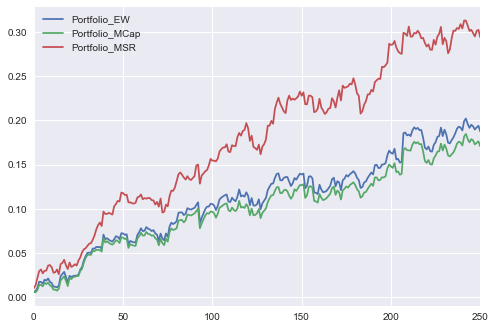

In [13]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR'])

### The GMV portfolio

The global minimum volatility portfolio, or GMV portfolio, is the portfolio with the lowest standard deviation (risk) and the highest return for the given risk level.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

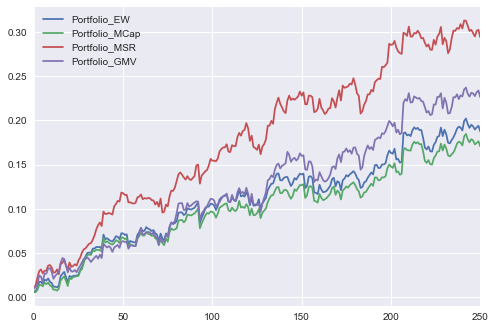

In [14]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0,0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(['Portfolio_EW', 'Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])